## Cantidad de Leads


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import functions as f

### Se denotan 129 leads obtenidos en las 9 iteraciones realizadas

##### ¿Cuantos fueron descartados? ¿cuantos calificados?

In [50]:
meetings = pd.read_csv("Promotoras\MeetingsPromotoras.csv", low_memory=False)
logs = pd.read_csv("Promotoras\logsValeria.csv", sep=';', low_memory=False)

logs["Teléfono"] = logs["Teléfono"].astype(str).str.replace(r'\.0$', '', regex=True).str[-7:]
f.combine(meetings)
meetings = meetings.drop(["Telefono","Phone","Movil","Mobile"],axis=1)


### De los 129 leads, 65 agendaron. un 50% de las personas.

In [51]:
# Cruzo los datos
logsXmeetings = pd.merge(
    logs[['Teléfono','Iteración','Precalificación','Walk-in','Atendidos ','Visitó','Comentarios','Promotora','Asesor','Leyenda']],  
    meetings[['Telefono_final','Title','Estado Reunión','Stage','Spazios']],  
    left_on='Teléfono',  
    right_on='Telefono_final',
    how='inner' 
)


### Precalificaciones

In [64]:
precalif = logsXmeetings['Precalificación'].value_counts(dropna=False)/66 * 100
precalif



Precalificación
DEPTO                57.575758
Pasa sin precalif    22.727273
MT                   15.151515
NaN                   3.030303
Abandona              1.515152
Name: count, dtype: float64

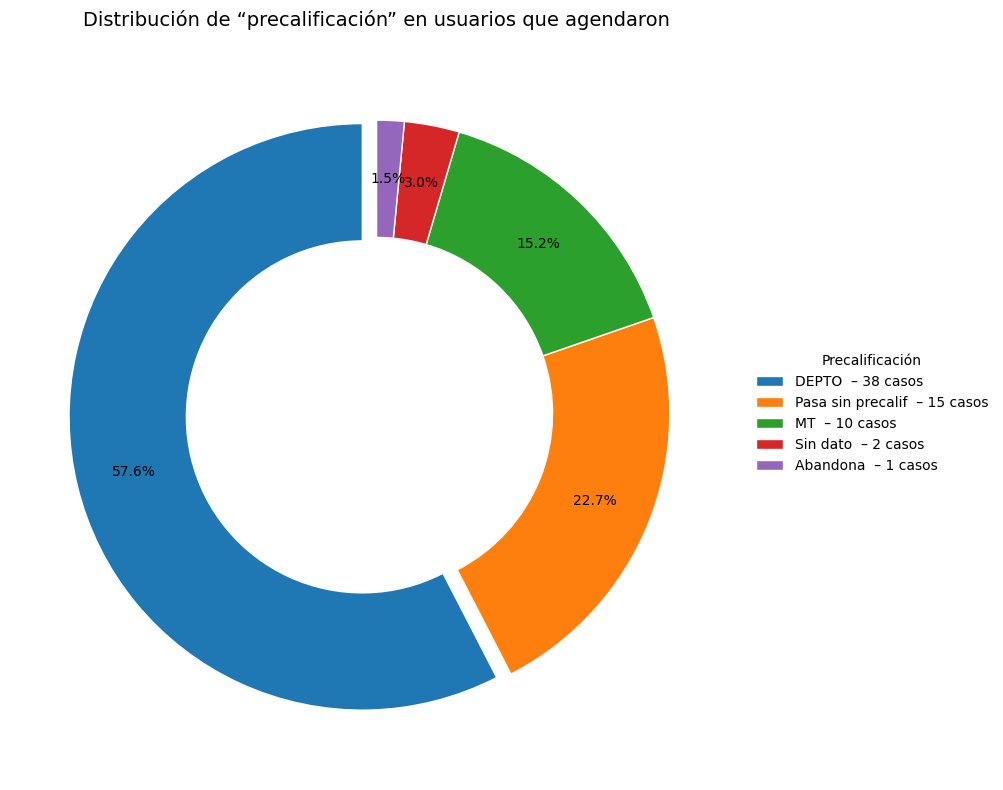

In [85]:
# --- 1. Reemplazar NaN por texto explícito -------------
col = logsXmeetings['Precalificación'].fillna('Sin dato')

# --- 2. Frecuencias absolutas --------------------------
freq = col.value_counts(dropna=False)

labels = freq.index
sizes  = freq.values

# --- 1. Destacar la porción más grande ---------------
explode = [0.05 if s == sizes.max() else 0 for s in sizes]

# --- 2. Gráfico de dona con leyenda externa ----------
fig, ax = plt.subplots(figsize=(11, 8))

wedges, texts, autotexts = ax.pie(
    sizes,
    startangle = 90,
    explode     = explode,
    # Donut: width < 1  (0.4 = 40 % del radio)
    wedgeprops  = dict(width=0.4, edgecolor='white'),
    autopct     = '%1.1f%%',    # solo % adentro
    pctdistance = 0.80,         # % más cerca del borde interior
    labels      = None          # quitamos las labels dentro
)

# --- 3. Leyenda con conteos --------------------------
ax.legend(
    wedges,
    [f'{l}  – {s} casos' for l, s in zip(labels, sizes)],
    title='Precalificación',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=False
)

# --- 4. Detalles estéticos ---------------------------
ax.set_title('Distribución de “precalificación” en usuarios que agendaron', fontsize=14, pad=15)
ax.set(aspect='equal')          # círculo perfecto

plt.tight_layout()
plt.show()

### Ventas

In [53]:
ventas = logsXmeetings['Spazios'].value_counts()
print(ventas)


Spazios
Alpatacal 3620    1
Name: count, dtype: int64


In [54]:
venta = logsXmeetings.loc[logsXmeetings["Spazios"] == "Alpatacal 3620"]
venta

   Teléfono Iteración Precalificación   Walk-in       Atendidos  Visitó  \
55  6873418       It8           DEPTO  Agendado  Cumple Ag Depto    NaN   

                         Comentarios Promotora   Asesor  \
55  Va al cine y viene a las 3:00 PM        VH  Franco    

                        Leyenda Telefono_final  \
55  COMPROOOO EN SANTOS LUGARES        6873418   

                                                Title Estado Reunión    Stage  \
55  (FM)Shopping Devoto - Promotora - Daniela Mani...      REALIZADO  Reserva   

           Spazios  
55  Alpatacal 3620  


### Estado del lead

In [68]:
stage = logsXmeetings['Stage'].value_counts(dropna=False)/66 *100
reservaCaida = logsXmeetings.loc[logsXmeetings["Stage"] == "Reserva caida"]
stage


Stage
Seguimiento      46.969697
NaN              40.909091
3. Frío           3.030303
Prioridad         3.030303
Para llamar       1.515152
Reserva caida     1.515152
Perdido           1.515152
Reserva           1.515152
Name: count, dtype: float64

In [56]:
reservaCaida

,Teléfono,Iteración,Precalificación,Walk-in,Atendidos,Visitó,Comentarios,Promotora,Asesor,Leyenda,Telefono_final,Title,Estado Reunión,Stage,Spazios
34,2062673,It5,Pasa sin precalif,Momento MT,Time OK MT,SI,Se acercaron mientras hablaba con otro lead.,VH,Dalmiro Mamertino,RESERVO METROTERRA,2062673,Shopping Devoto - Promotora - Joan Rojas,REALIZADO,Reserva caida,NaN


In [62]:
reunion = logsXmeetings['Estado Reunión'].value_counts(dropna=False)/66 * 100
reunion

Estado Reunión
REALIZADO    62.121212
AUSENTE      31.818182
CANCELADO     6.060606
Name: count, dtype: float64

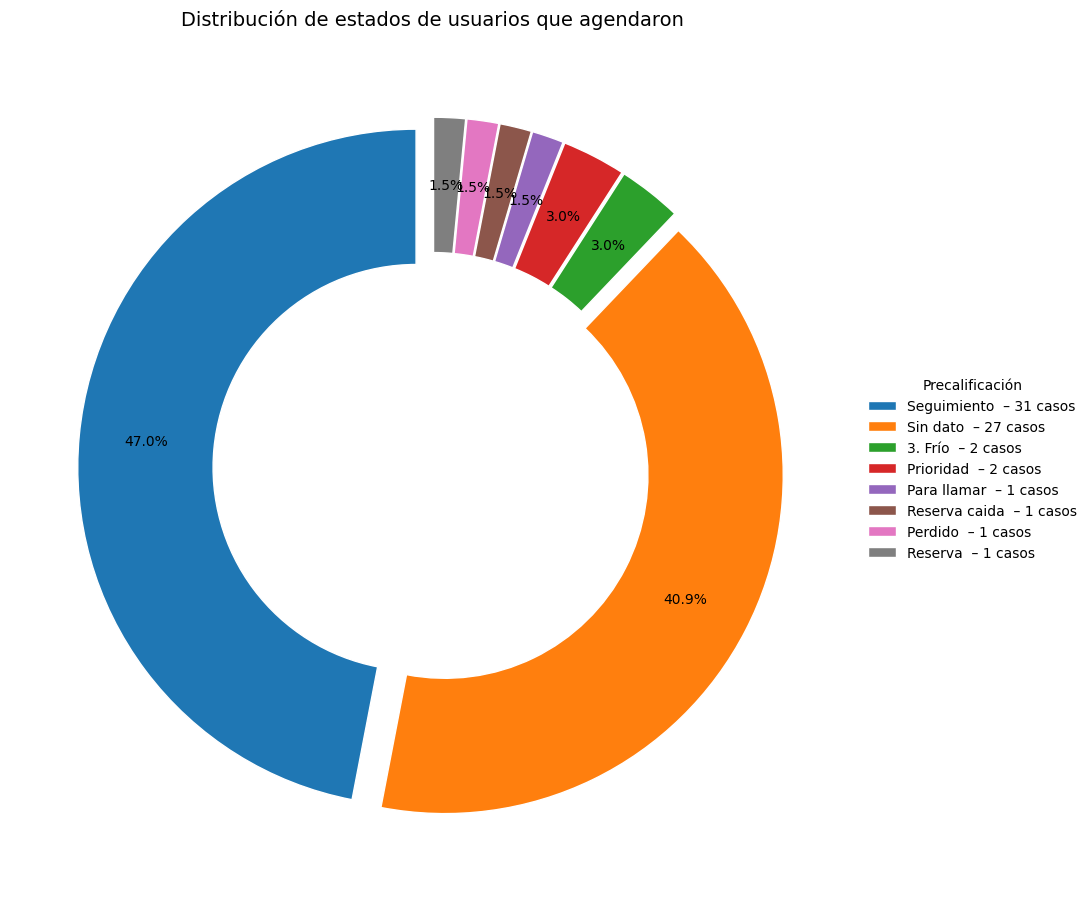

In [94]:
# --- 1. Reemplazar NaN por texto explícito -------------
col = logsXmeetings['Stage'].fillna('Sin dato')

# --- 2. Frecuencias absolutas --------------------------
freq = col.value_counts(dropna=False)

labels = freq.index
sizes  = freq.values

# --- 1. Destacar la porción más grande ---------------
explode = [0.05 if s == sizes.max() else 0.04 for s in sizes]

# --- 2. Gráfico de dona con leyenda externa ----------
fig, ax = plt.subplots(figsize=(11, 11))

wedges, texts, autotexts = ax.pie(
    sizes,
    startangle = 90,
    explode     = explode,
    # Donut: width < 1  (0.4 = 40 % del radio)
    wedgeprops  = dict(width=0.4, edgecolor='white'),
    autopct     = '%1.1f%%',    # solo % adentro
    pctdistance = 0.80,         # % más cerca del borde interior
    labels      = None          # quitamos las labels dentro
)

# --- 3. Leyenda con conteos --------------------------
ax.legend(
    wedges,
    [f'{l}  – {s} casos' for l, s in zip(labels, sizes)],
    title='Precalificación',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    frameon=False
)

# --- 4. Detalles estéticos ---------------------------
ax.set_title('Distribución de estados de usuarios que agendaron', fontsize=14, pad=15)
ax.set(aspect='equal')          # círculo perfecto

plt.tight_layout()
plt.show()